In [1]:
import face_recognition
import pickle
import pandas as pd
from tqdm import tqdm

In [2]:
df = pd.read_csv("labels_utf8.csv")
failed_images = list()
failed_race = list()
failed_sex = list()

for name in tqdm(df['ID']):
    if len(face_recognition.face_encodings(face_recognition.load_image_file(f"/Users/nathaniel/Downloads/mugshots/front/front/{name}"))) == 0:
        failed_person = df[df['ID'] == name]
        failed_images.append(name)
        failed_race.append(failed_person['Race'].iloc[0])
        failed_sex.append(failed_person['Sex'].iloc[0])

100%|██████████| 69827/69827 [2:14:15<00:00,  8.67it/s]   


TypeError: dump() missing required argument 'file' (pos 2)

In [19]:
with open("failed_names", 'wb') as f:
    pickle.dump(failed_images, f)
with open("failed_race", 'wb') as f:
    pickle.dump(failed_race, f)
with open("failed_sex", 'wb') as f:
    pickle.dump(failed_sex, f)

In [3]:
from matplotlib import pyplot as plt

In [4]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [11]:
fr = pd.Series(failed_race)

In [13]:
fr.value_counts()

Black    120
White     15
dtype: int64

In [14]:
fs = pd.Series(failed_sex)

In [15]:
fs.value_counts()

Male      134
Female      1
dtype: int64

In [17]:
df['Race'].value_counts()

Black            39282
White            21158
Hispanic          8910
Asian              256
Amer Indian        102
Bi-Racial           82
Not Available       37
Name: Race, dtype: int64

In [18]:
df['Sex'].value_counts()

Male      64944
Female     4883
Name: Sex, dtype: int64

In [33]:
num_unrecognized_black = len(fr[fr=='Black'])
print(f"Percentage of unrecognized faces that were African American: {num_unrecognized_black/len(fr)}")

Percentage of unrecognized faces that were African American: 0.8888888888888888


In [34]:
races = df['Race']
num_black = len(races[races=='Black'])
print(f"Percentage of faces in the dataset that were African American: {num_black/len(races)}")

Percentage of faces in the dataset that were African American: 0.5625617597777364


In [35]:
print(f"Percentage of African American faces recognized: {(num_black - num_unrecognized_black)/num_black}")

Percentage of African American faces recognized: 0.9969451657247594


In [36]:
num_unrecognized_white = len(fr[fr=='White'])
print(f"Percentage of unrecognized faces that were White: {num_unrecognized_white/len(fr)}")

Percentage of unrecognized faces that were White: 0.1111111111111111


In [37]:
num_white = len(races[races=='White'])
print(f"Percentage of faces in the dataset that were White: {num_white/len(races)}")

Percentage of faces in the dataset that were White: 0.3030060005442021


In [38]:
print(f"Percentage of White faces recognized: {(num_white - num_unrecognized_white)/num_white}")

Percentage of White faces recognized: 0.9992910483032422


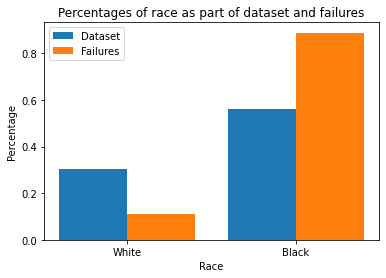

In [39]:
import numpy as np
  
X = ['White', 'Black']
Y = [num_white/len(races), num_black/len(races)]
Z = [num_unrecognized_white/len(fr), num_unrecognized_black/len(fr)]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Dataset')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Failures')
  
plt.xticks(X_axis, X)
plt.xlabel("Race")
plt.ylabel("Percentage")
plt.title("Percentages of race as part of dataset and failures")
plt.legend()
plt.show()